# 機器学習入門

### 教師あり学習

$~~~~$今回は機械学習の手法の一つである教師あり学習を紹介します。

$~~~~$分類問題における機器学習のフローは以下に示します。
+ データセットをトレーニングセットとテストセットに分割
+ トレーニングセットとそれに対応するラベルを用いて、モデルの学習します
+ テストセットとそれに対応するラベルを用いて、モデルの性能評価します
今回はScikit-learnライブラリを利用して、機器学習を行います

$~~~~$Irisというデータセットは、150サンプルのアヤメの花の計測データ（**特徴量**）が記録されています。

$~~~~$Setosa，Versicolor，Virginicaの3つの品種（**クラス**）がそれぞれのサンプルに振られており，**特徴量**から品種の予測(**クラス分類**)を行うことが目的になります。

$~~~~$以下の例は、そのデータセットを利用して、Logistic Regression，Support Vector Machineの2つの手法を取り上げます。

$~~~~$モジュールのインポートと設定

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# function to plot decision region
def plot_decision_regions(X, y, classifier, resolution=0.02):
  # setup marker for generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  labels = {0:"Setosa", 1:"Versicolor", 2:"Virginica"}
  # plot class samples:
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                alpha=0.8, c=cmap(idx),
                edgecolor='black',
                marker=markers[idx],
                label=labels[cl])



$~~~~$データセットを読み込む

In [ ]:
from sklearn import datasets
import pandas as pd

# load Iris dataset
iris = datasets.load_iris()

# output the first five samples
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


$~~~~$本例では、「sepal length」と「sepal width」を特徴量として、アヤメの花を分類します。

In [ ]:
# input(data)
X = iris.data[:,[0,1]]
# output(label)
y = iris.target

print(X[0])
print(y[0])

[5.1 3.5]
0


$~~~~$トレーニングとテストデータセットの分割



In [ ]:
from sklearn.model_selection import train_test_split
# 30% of dataset is set as test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

print(X_train.shape)
print(y_train.shape)
print(y_train)

(105, 2)
(105,)
[0 0 2 2 0 2 2 0 2 1 1 1 0 1 1 2 0 1 1 0 2 2 1 1 1 2 1 2 2 2 1 0 2 2 2 2 1
 2 2 0 2 0 2 0 0 1 0 0 2 1 0 1 1 0 0 0 1 2 0 1 0 1 2 0 0 1 2 1 1 1 2 1 1 2
 2 1 0 0 2 1 2 2 0 1 2 2 0 0 2 0 2 1 1 1 0 2 1 0 0 1 0 1 0 0 0]


### Logistic Regression

$~~~~$ロジスティック回帰は、ベルヌーイ分布に従う変数の統計的回帰モデルの一種であり、線形分離が可能なクラスに対して有効。

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic Regression instance
lr = LogisticRegression(C=100, random_state=1)

# Trainging
lr.fit(X_train, y_train)

# Result
pred = lr.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f"Accuracy: {acc:.2%}")

Accuracy: 68.89%


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


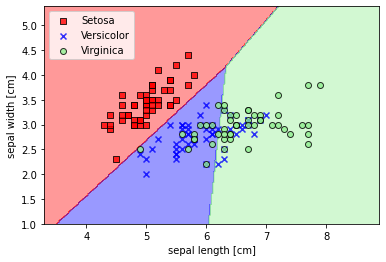

In [ ]:
plot_decision_regions(X, y, classifier=lr)
plt.xlabel("sepal length [cm]")
plt.ylabel("sepal width [cm]")
plt.legend(loc="upper left")

plt.tight_layout
plt.show()

### Support Vector Machine

$~~~~$サポートベクターマシンは、教師あり学習を用いるパターン認識モデルの一つである。

![svm](https://github.com/Luyaojun/ImageAIDemo/blob/master/svm.png?raw=true)

H3 は二つのクラスのいくつかの点を正しく分類していない。H1 と H2 は二つのクラスのいくつかの点を分類するのに、H2 が H1 よりもっと大きいマージンを持って分類することを確認することができる。$^{[1]}$

[1] [wikipedia](https://ja.wikipedia.org/wiki/%E3%82%B5%E3%83%9D%E3%83%BC%E3%83%88%E3%83%99%E3%82%AF%E3%82%BF%E3%83%BC%E3%83%9E%E3%82%B7%E3%83%B3)

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel="rbf", C=1.0, gamma=0.1, random_state=1)
svm.fit(X_train, y_train)

# Result
pred = svm.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f"Accuracy: {acc:.2%}")

Accuracy: 71.11%


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


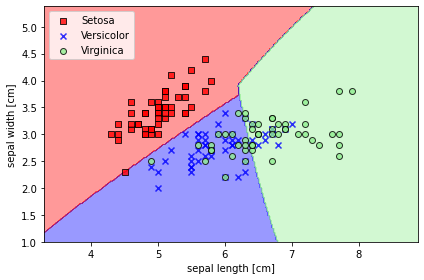

In [ ]:
plot_decision_regions(X, y, classifier=svm)
plt.xlabel("sepal length [cm]")
plt.ylabel("sepal width [cm]")
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

### 参考資料

- Python機械学習プログラミング  
https://github.com/rasbt/python-machine-learning-book
- Logisticregression  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html  
https://data-science.gr.jp/implementation/iml_sklearn_logistic_regression.html
- SVM  
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

### 演習課題

上記の例では、「sepal length」と「sepal width」を特徴量として、アヤメの花を分類します。演習課題では，全ての特徴量を用いて3つのクラスを分類し，accuracy(精度)を計算してみよう．

In [1]:
# 共有部分
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Irisデータセットの読み込み
iris = datasets.load_iris()

# Petal length & width を取得
X = iris.data
y = iris.target

# トレーニングデータとテストデータの分割
# 30%をテストデータに設定
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)

In [2]:
# 解答欄(Logistic regression)
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

# Logistic Regression instance
lr = LogisticRegression(C=100, random_state=1, solver='liblinear', multi_class='auto')
lr.fit(X_train, y_train)

# predict test data
pred = lr.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f"Accuracy: {acc:.2%}")

Accuracy: 100.00%


In [3]:
# 解答欄(Support Vector Machine)
from sklearn.svm import SVC

svm = SVC(kernel = "rbf", C=1.0, gamma=0.1, random_state=1)
svm.fit(X_train, y_train)

#predict test data
pred = svm.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f"Accuracy: {acc:.2%}")

Accuracy: 97.78%
